# Random Sample Imputation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df=df[['Age','Fare','Survived']]
df.head(10)

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
5,NaN,8.4583,0
6,54.0,51.8625,0
7,2.0,21.0750,0
8,27.0,11.1333,1
9,14.0,30.0708,1


In [16]:
df.Age.isna().sum()

177

In [36]:
#Replacing the NaN with Random samples
random_sample=df.Age.dropna().sample(df.Age.isna().sum(), random_state=10)
random_sample.index


Int64Index([728, 555, 426, 278, 617, 751, 576, 679, 567, 117,
            ...
            889, 225, 325, 233, 122, 696, 486,  44,  62, 571],
           dtype='int64', length=177)

In [116]:
def impute_na(ds,ftr,method):
    df[ftr+'median']=df[ftr].fillna(method)
    df[ftr+'random']=df[ftr]
    
    #Ramdom samples with which we would replacing NaN
    random_samp=df[ftr].dropna().sample(df[ftr].isna().sum(), random_state=10)
    
    #Extracting the index on which values are NaN originally in Age feature
    random_samp.index=df[df[ftr].isna()].index

    #Replacing the NaN values with Random samples 
    #df[df[ftr+'random'].isna()][ftr+'random']=random_samp
    df.loc[df[ftr].isna(),ftr+'random']=random_samp 
  

In [117]:
median=df.Age.median()
impute_na(df,'Age',median)

In [118]:
df

,Age,Fare,Survived,Agemedian,Agerandom
0,22.0,7.2500,0,22.0,22.0
1,38.0,71.2833,1,38.0,38.0
2,26.0,7.9250,1,26.0,26.0
3,35.0,53.1000,1,35.0,35.0
4,35.0,8.0500,0,35.0,35.0
...,...,...,...,...,...
886,27.0,13.0000,0,27.0,27.0
887,19.0,30.0000,1,19.0,19.0
888,NaN,23.4500,0,28.0,53.0
889,26.0,30.0000,1,26.0,26.0


In [119]:
df.loc[df['Age'].isna(),'Agerandom']

5      25.0
17     62.0
19     28.0
26      7.0
28     26.0
       ... 
859    44.0
863    35.0
868    19.0
878    45.0
888    53.0
Name: Agerandom, Length: 177, dtype: float64

### Advantages of Random Imputation:

In [129]:
print('Before imputation mean is:',df.Age.mean())
print('Before imputation Standard Deviation is:',df.Age.std(),'\n')
print('After random imputation mean is:', df.Agerandom.mean())
print('After random imputation Standard Deviation is:',df.Agerandom.std())


Before imputation mean is: 29.69911764705882
Before imputation Standard Deviation is: 14.526497332334044 

After random imputation mean is: 29.60213243546577
After random imputation Standard Deviation is: 14.459158652243763


#### We can observe that there has not been much effect on mean and variance (std) when we use random imputation method.
It's easy to implement as well

### Let's see the distribution

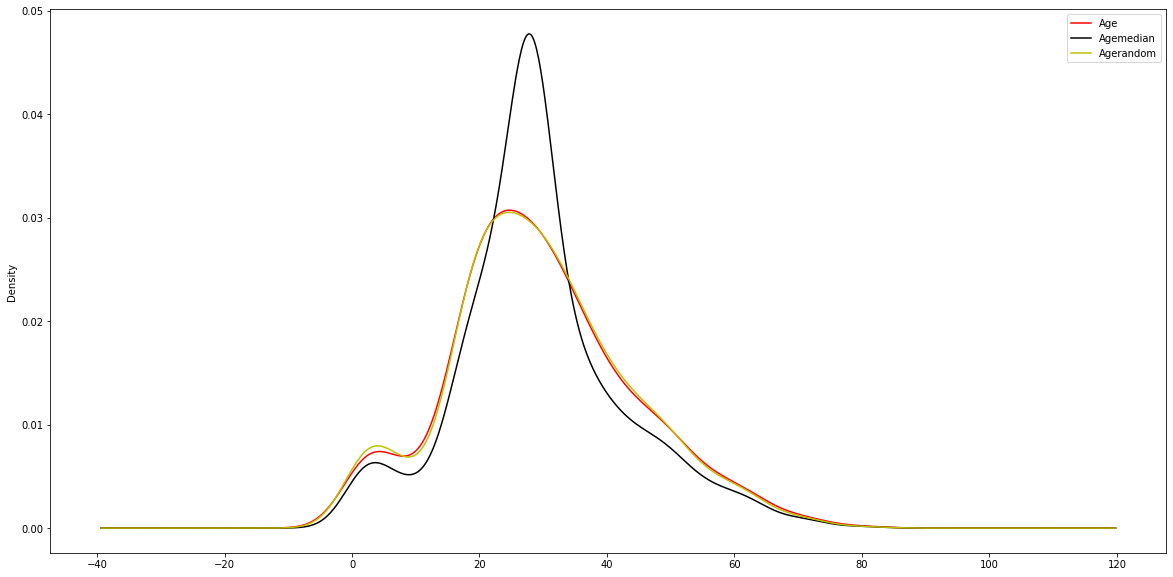

In [149]:
fig=plt.figure(figsize=[20,10])
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='r');
df['Agemedian'].plot(kind='kde', ax=ax, color='black');
df['Agerandom'].plot(kind='kde', ax=ax,color='y');
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best');

### From the above graph we could observe that random imputation has not effected the variance and mean much as compared to median imputation

# Capturing NaN values along with new feature

In [151]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df=df[['Age','Fare','Survived']]
df.head(10)

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
5,NaN,8.4583,0
6,54.0,51.8625,0
7,2.0,21.0750,0
8,27.0,11.1333,1
9,14.0,30.0708,1


In [152]:
df['Age_NAN']=np.where(df['Age'].isna(),1,0)

In [153]:
df

,Age,Fare,Survived,Age_NAN
0,22.0,7.2500,0,0
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,1,0
888,NaN,23.4500,0,1
889,26.0,30.0000,1,0


### Now the presence of this 1/0 in the Age_NAN column shows a kind of importance to model that this column also means something

### Now we can go ahead and replace the NaN values in age column with mean/median value

In [156]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [159]:
df

,Age,Fare,Survived,Age_NAN
0,22.0,7.2500,0,0
1,38.0,71.2833,1,0
2,26.0,7.9250,1,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,1,0
888,28.0,23.4500,0,1
889,26.0,30.0000,1,0


## End of Distribution Imputation

In [160]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df=df[['Age','Fare','Survived']]
df.head(10)

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0
5,NaN,8.4583,0
6,54.0,51.8625,0
7,2.0,21.0750,0
8,27.0,11.1333,1
9,14.0,30.0708,1


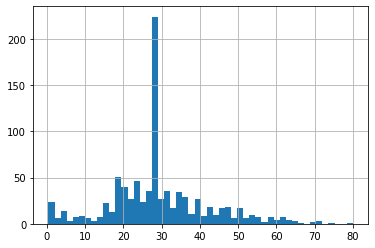

In [180]:
df.Age.hist(bins=50)

In [170]:
extreme=df.Age.mean() + 3*df.Age.std()
median=df.Age.median()

### End of distribution imputation basically means to replace the NaN values with the one present on the right extreme of normal distribution after 3rd SD.

### Now we have to check for the outliers:

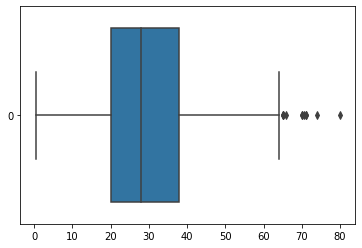

In [174]:
import seaborn as sns
sns.boxplot(data=df.Age, orient='h')

In [175]:
def impute_nan(ds,ftr,median,extreme):
    df[ftr+'_end_dist']=df[ftr].fillna(extreme)
    df[ftr].fillna(median, inplace=True)
    

In [176]:
impute_nan(df,'Age',median,extreme)

In [177]:
df

,Age,Fare,Survived,Age_end_dist
0,22.0,7.2500,0,22.00000
1,38.0,71.2833,1,38.00000
2,26.0,7.9250,1,26.00000
3,35.0,53.1000,1,35.00000
4,35.0,8.0500,0,35.00000
...,...,...,...,...
886,27.0,13.0000,0,27.00000
887,19.0,30.0000,1,19.00000
888,28.0,23.4500,0,73.27861
889,26.0,30.0000,1,26.00000


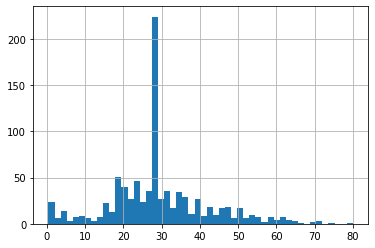

In [182]:
df.Age.hist(bins=50) #Replaced the NAN values with median values

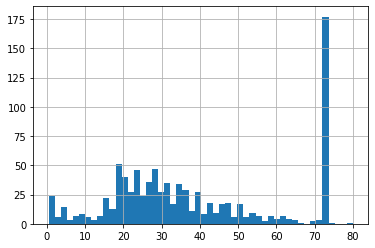

In [183]:
df.Age_end_dist.hist(bins=50) #replaced the NAN vaues with end of ditribution values

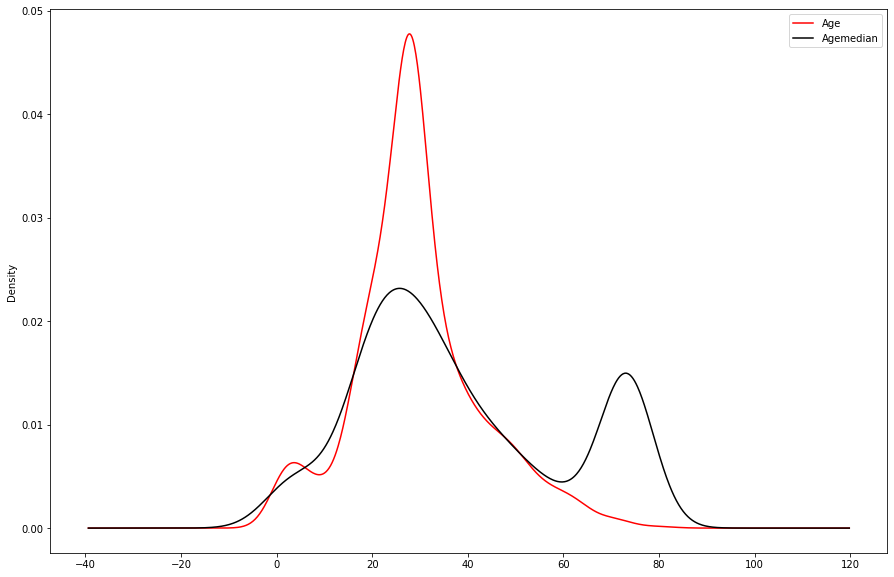

In [221]:
fig=plt.figure(figsize=[15,10])
ax=fig.add_subplot(111)

df['Age'].plot(kind='kde', color='r',ax=ax)
df['Age_end_dist'].plot(kind='kde',color='black',ax=ax)
lines,lables=ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')



In [222]:
df

,Age,Fare,Survived,Age_end_dist
0,22.0,7.2500,0,22.00000
1,38.0,71.2833,1,38.00000
2,26.0,7.9250,1,26.00000
3,35.0,53.1000,1,35.00000
4,35.0,8.0500,0,35.00000
...,...,...,...,...
886,27.0,13.0000,0,27.00000
887,19.0,30.0000,1,19.00000
888,28.0,23.4500,0,73.27861
889,26.0,30.0000,1,26.00000


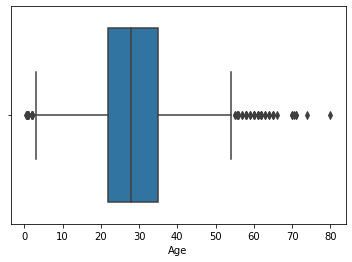

In [224]:
sns.boxplot(df.Age)

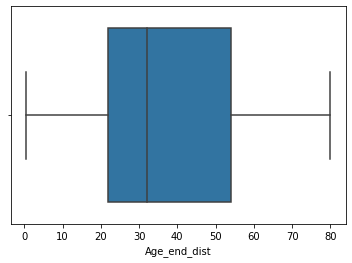

In [226]:
sns.boxplot(df.Age_end_dist)#outliers handled in this case